<a href="https://www.kaggle.com/code/cs21b2033arpitsingh/brain-tumor-ipynb?scriptVersionId=182391556" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
train_images=[]
masked_images=[]

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        k=os.path.join(dirname,filename)
        if dirname=='/kaggle/input/brain-tumor-segmentation/images':
            train_images.append(filename)
        if dirname=="/kaggle/input/brain-tumor-segmentation/masks":
            masked_images.append(filename)
    


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [24]:


for i in range(len(train_images)):
    train_images[i]=int(train_images[i].split(".")[0])

train_images.sort()






In [25]:

for i in range(len(masked_images)):
    masked_images[i]=int(masked_images[i].split(".")[0])

masked_images.sort()



In [26]:
#now we will prepare the link
for i in range(len(train_images)):
    l=str(train_images[i])
    train_images[i]='/kaggle/input/brain-tumor-segmentation/images/'+l+'.png'
    



In [27]:
#now we will prepare the link
for i in range(len(masked_images)):
    l=str(masked_images[i])
    masked_images[i]='/kaggle/input/brain-tumor-segmentation/masks/'+l+'.png'
    


(512, 512)


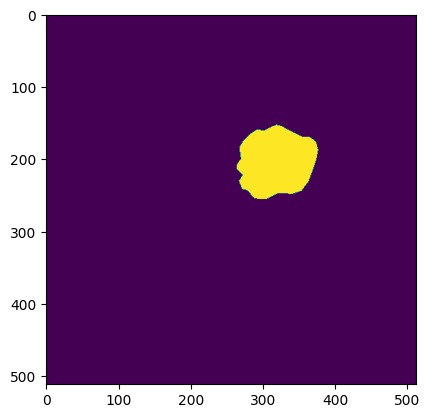

(512, 512)


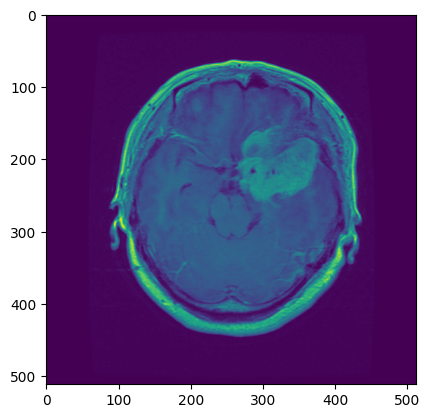

In [28]:
#now we have prepared the paths for the images 
#now lets see the  images


l=train_images
m=masked_images

import matplotlib.pyplot as plt 
x=plt.imread(masked_images[1])
print(x.shape)
plt.imshow(x)
plt.show()

y=plt.imread(train_images[1])
print(y.shape)
plt.imshow(y)
plt.show()


In [29]:
#print(m)



'''
#now lets prepare the test and the train set 
train_set=train_images[:300]
train_mask_set=masked_images[:300]

test_set=train_images[300:350]
test_mask_set=masked_images[300:350]
'''

'\n#now lets prepare the test and the train set \ntrain_set=train_images[:300]\ntrain_mask_set=masked_images[:300]\n\ntest_set=train_images[300:350]\ntest_mask_set=masked_images[300:350]\n'

In [30]:
#now we make the unet model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers  import Conv2D,MaxPooling2D,Input,UpSampling2D,concatenate
from keras.models import Model
from keras.utils import plot_model

     

In [31]:
#now here we use the keras functional api to create the U-net architecture

input= Input(shape=(512,512,1))

#now we code the encoder part
s1=Conv2D(64,3,activation='relu',padding='same')(input)
s1_1=Conv2D(64,3,activation='relu',padding='same')(s1)
#then we use the maxpooling layer to downsample our input shape

p1=MaxPooling2D(pool_size=(2,2))(s1_1)

#now we again use the convolutional layers to find out the features
s2=Conv2D(128,3,activation='relu',padding='same')(p1)
s2_1=Conv2D(128,3,activation='relu',padding='same')(s2)

#use the maxpool layer
p2=MaxPooling2D(pool_size=(2,2))(s2_1)


#now we again use the convolutional layers to find out the features
s3=Conv2D(256,3,activation='relu',padding='same')(p2)
s3_1=Conv2D(256,3,activation='relu',padding='same')(s3)

#use the maxpool layer
p3=MaxPooling2D(pool_size=(2,2))(s3_1)


#now we again use the convolutional layers to find out the features
s4=Conv2D(512,3,activation='relu',padding='same')(p3)
s4_1=Conv2D(512,3,activation='relu',padding='same')(s4)

#use the maxpool layer
p4=MaxPooling2D(pool_size=(2,2))(s4_1)


#now we again use the convolutional layers to find out the features
b1=Conv2D(1024,3,activation='relu',padding='same')(p4)
b1_1=Conv2D(1024,3,activation='relu',padding='same')(b1)
#this was the last vector
#now we move to the decoder part


#this is the decoder part
#we first upsample the part and then give it to the convolutional layer (where we also try to decrese the number of filters)
c1=UpSampling2D(size=(2,2))(b1_1)
#we now give it to the convolutional layer
d1=Conv2D(512,2,activation='relu',padding='same')(c1)
d1=concatenate([s4_1,d1])
d1_1=Conv2D(512,3,activation='relu',padding='same')(d1)
d1_2=Conv2D(512,3,activation='relu',padding='same')(d1_1)


#we first upsample the part and then give it to the convolutional layer (where we also try to decrese the number of filters)
c2=UpSampling2D(size=(2,2))(d1_2)
#we now give it to the convolutional layer
d2=Conv2D(256,2,activation='relu',padding='same')(c2)
d2=concatenate([s3_1,d2])
d2_1=Conv2D(256,3,activation='relu',padding='same')(d2)
d2_2=Conv2D(256,3,activation='relu',padding='same')(d2_1)


#we first upsample the part and then give it to the convolutional layer (where we also try to decrese the number of filters)
c3=UpSampling2D(size=(2,2))(d2_2)
#we now give it to the convolutional layer
d3=Conv2D(128,2,activation='relu',padding='same')(c3)
d3=concatenate([s2_1,d3])
d3_1=Conv2D(128,3,activation='relu',padding='same')(d3)
d3_2=Conv2D(128,3,activation='relu',padding='same')(d3_1)



#we first upsample the part and then give it to the convolutional layer (where we also try to decrese the number of filters)
c4=UpSampling2D(size=(2,2))(d3_2)
#we now give it to the convolutional layer
d4=Conv2D(64,2,activation='relu',padding='same')(c4)
d4=concatenate([s1_1,d4])
d4_1=Conv2D(64,3,activation='relu',padding='same')(d4)
d4_2=Conv2D(64,3,activation='relu',padding='same')(d4_1)


#we now give it to the convolutional layer
d5=Conv2D(2,3,activation='relu',padding='same')(d4_2)
out=Conv2D(1,1,activation='sigmoid',padding='same')(d5)




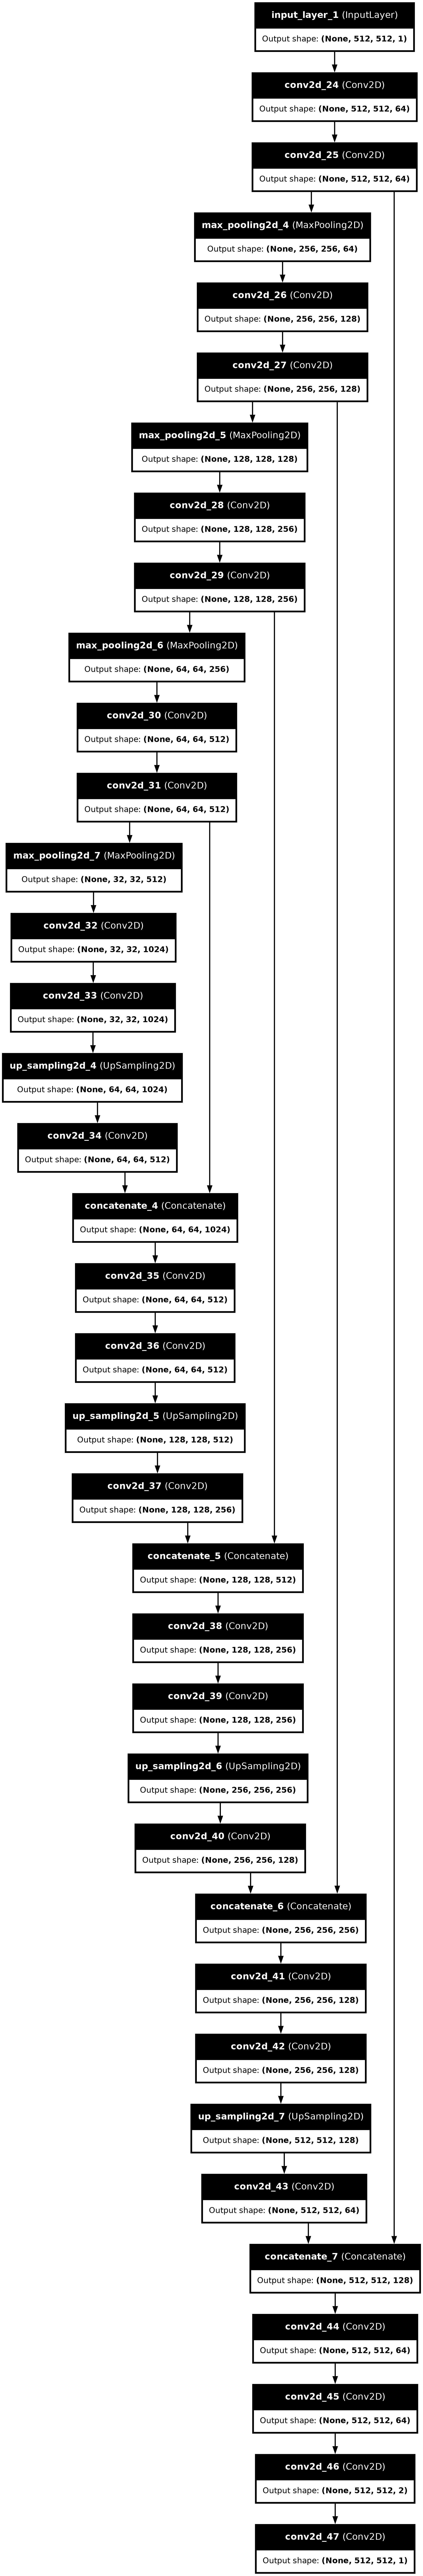

In [32]:
#we now try to check for the decoder part also
model=Model(inputs=input,outputs=out)
plot_model(model,show_shapes=True,show_layer_names=True)

In [33]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 512, 512,  │        640 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 512, 512,  │     36,928 │ conv2d_24[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 256, 256,  │          0 │ conv2d_25[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 256, 256,  │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 256, 256,  │    147,584 │ conv2d_26[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 128, 128,  │          0 │ conv2d_27[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 128, 128,  │    295,168 │ max_pooling2d_5[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 128, 128,  │    590,080 │ conv2d_28[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 64, 64,    │          0 │ conv2d_29[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 64, 64,    │  1,180,160 │ max_pooling2d_6[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 64, 64,    │  2,359,808 │ conv2d_30[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 32, 32,    │          0 │ conv2d_31[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 32, 32,    │  4,719,616 │ max_pooling2d_7[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 32, 32,    │  9,438,208 │ conv2d_32[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_4     │ (None, 64, 64,    │          0 │ conv2d_33[0][0]   │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 64, 64,    │  2,097,664 │ up_sampling2d_4[

 Total params: 31,031,685 (118.38 MB)

 Trainable params: 31,031,685 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
train_set=[]
train_set_masked=[]



for i in range(10):
    train_set.append(l[i])
    train_set_masked.append(m[i])
    
    


In [ ]:
print(len(train_set))
print(len(train_set_masked))



In [35]:
test_set=[]
test_set_masked=[]

for i in range(10,15):
    test_set.append(l[i])
    test_set_masked.append(m[i])
print(len(test_set))
print(len(test_set_masked))




5
5


In [36]:
train_set_image=[]
train_masked_set_image=[]

test_set_image=[]
test_masked_set_image=[]

for i in range(len(train_set)):
    x=plt.imread(train_set[i])
    x=np.expand_dims(x, axis=-1)
    train_set_image.append(x)
    
    y=plt.imread(train_set_masked[i])
    y=np.expand_dims(y,axis=-1)
    train_masked_set_image.append(y)
    
    print(x.shape)
    print(y.shape)
    
    


(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)


In [37]:
for j in range(len(test_set)):
    x=plt.imread(test_set[j])
    x=np.expand_dims(x, axis=-1)
    test_set_image.append(x)
    
    y=plt.imread(test_set_masked[j])
    y=np.expand_dims(y,axis=-1)
    test_masked_set_image.append(y)
    
    print(x.shape)
    print(y.shape)


(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)


In [38]:
#after creating the model we need to compile the model 
model.compile(optimizer='rmsprop',loss='mae',metrics=['accuracy'])


In [39]:
train_set_image=np.asarray(train_set_image)
train_masked_set_image=np.asarray(train_masked_set_image)

test_set_image=np.asarray(test_set_image)
test_masked_set_image=np.asarray(test_masked_set_image)

In [40]:
model.fit(train_set_image,train_masked_set_image,verbose=1,batch_size=1,epochs=3)

Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.8850 - loss: 0.3779
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9805 - loss: 0.0201
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9824 - loss: 0.0178


In [41]:
model.save('model.h5')

In [42]:
model.evaluate(test_set_image,test_masked_set_image,verbose=1,batch_size=2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 473ms/step - accuracy: 0.9743 - loss: 0.0259


[0.024938421323895454, 0.9751937985420227]